In [14]:
import glob
import shutil
import os
from imagededup.methods import PHash
phasher = PHash()

In [37]:
dataset_dir = "datasets/potholes"
sets_dir = dataset_dir + "/sets"

mixed_dir = sets_dir + "/mixed"
m_images_dir = mixed_dir + "/images"
m_labels_dir = mixed_dir + "/labels"

os.makedirs(mixed_dir, exist_ok=True)
os.makedirs(m_images_dir, exist_ok=True)
os.makedirs(m_labels_dir, exist_ok=True)

In [20]:
all_images = sorted([path.replace("\\","/") for path in glob.glob(sets_dir + "/*/*/images/*.jpg")])
all_labels = [path.replace("/images/","/labels/").replace(".jpg",".txt") for path in all_images]

In [21]:
all_labels

['datasets/potholes/sets/d1/train/labels/pic-1-_jpg.rf.49882cdb272111f43a6656b1494a4918.txt',
 'datasets/potholes/sets/d1/train/labels/pic-1-_jpg.rf.8d95dd1d29760a2634a45cc7fdd84b31.txt',
 'datasets/potholes/sets/d1/train/labels/pic-1-_jpg.rf.e238c9bf3fe82e8ac55b0014a27fc529.txt',
 'datasets/potholes/sets/d1/train/labels/pic-10-_jpg.rf.1d433d21e11d000b6b498eacb88fe4a9.txt',
 'datasets/potholes/sets/d1/train/labels/pic-10-_jpg.rf.500c683a687e403f4cdade4826a84b5b.txt',
 'datasets/potholes/sets/d1/train/labels/pic-10-_jpg.rf.5a901c212d899a7dc7dc78be7de892c0.txt',
 'datasets/potholes/sets/d1/train/labels/pic-100-_jpg.rf.17047bb032a49c96643c5f2108bb99dd.txt',
 'datasets/potholes/sets/d1/train/labels/pic-100-_jpg.rf.8c9076ee84698f90f04765f4e794a819.txt',
 'datasets/potholes/sets/d1/train/labels/pic-100-_jpg.rf.ebc3af260e989e6f9e1e9221b9dff6b0.txt',
 'datasets/potholes/sets/d1/train/labels/pic-101-_jpg.rf.1e32a49f89a38974ded11bba8dd3e56b.txt',
 'datasets/potholes/sets/d1/train/labels/pic-101-

In [22]:
for index,(img_path,lbl_path) in enumerate(zip(all_images,all_labels)):
    shutil.copy(img_path,m_images_dir+f"/img-{index}.jpg")
    shutil.copy(lbl_path,m_labels_dir+f"/img-{index}.txt")

In [23]:
encodings = phasher.encode_images(image_dir=m_images_dir)

2024-10-01 15:40:18,315: INFO Start: Calculating hashes...
100%|██████████| 3975/3975 [00:20<00:00, 196.53it/s]
2024-10-01 15:40:42,338: INFO End: Calculating hashes!


In [24]:
duplicates = phasher.find_duplicates(encoding_map=encodings)

d:\JOBS\lemonio-building\research\ambiente\Lib\site-packages\imagededup-0.3.2-py3.12-win-amd64.egg\imagededup\methods\hashing.py:317: RuntimeWarning: Parameter num_enc_workers has no effect since encodings are already provided
  warnings.warn('Parameter num_enc_workers has no effect since encodings are already provided', RuntimeWarning)
2024-10-01 15:40:42,352: INFO Start: Evaluating hamming distances for getting duplicates
2024-10-01 15:40:42,355: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 3975/3975 [00:45<00:00, 87.03it/s] 
2024-10-01 15:41:31,542: INFO End: Retrieving duplicates using BKTree algorithm
2024-10-01 15:41:31,543: INFO End: Evaluating hamming distances for getting duplicates


In [25]:
from imagededup.utils.general_utils import get_files_to_remove

duplicated = get_files_to_remove(duplicates)

In [26]:
print(f"Total de imagenes: {len(all_images)}")
print(f"Total de imagenes repetidas: {len(duplicated)}")


Total de imagenes: 3975
Total de imagenes repetidas: 678


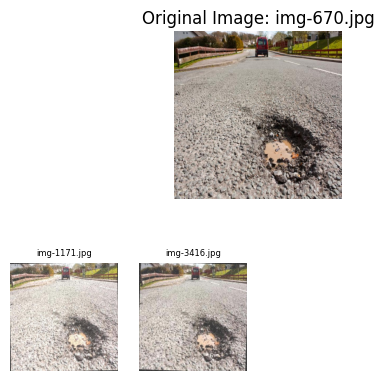

In [29]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=m_images_dir,
                duplicate_map=duplicates,
                filename=duplicated[0])  # you can change to see some others



In [35]:
import os
for img in duplicated:
    img_path = os.path.join(m_images_dir,img).replace("\\","/")
    lbl_path = os.path.join(m_labels_dir,img.replace(".jpg",".txt")).replace("\\","/")
    if os.path.exists(img_path):
        os.remove(img_path)
    if os.path.exists(lbl_path):
        os.remove(lbl_path)

In [44]:
not_duplicated_images = sorted([path.replace("\\","/") for path in glob.glob(sets_dir + "/mixed/images/*.jpg")])
not_duplicated_labels = [path.replace("/images/","/labels/").replace(".jpg",".txt") for path in all_images]

In [56]:
from sklearn.model_selection import train_test_split

# Paths
final_dir = dataset_dir + "/final"
train_dir = final_dir + "/train"
valid_dir = final_dir + "/valid"

os.makedirs(final_dir, exist_ok=True)

for path in train_dir,valid_dir,:
    os.makedirs(path, exist_ok=True)
    os.makedirs(os.path.join(path,"images"), exist_ok=True)
    os.makedirs(os.path.join(path,"labels"), exist_ok=True)

In [57]:
# Split the dataset into train (70%), validation (15%), and test (15%)
train_images, valid_images = train_test_split(not_duplicated_images, test_size=0.1, random_state=42)

# Function to move images to their respective directories
def copy_images(file_list, destination_dir):
    for img_path in file_list:
        shutil.copy(img_path, os.path.join(destination_dir, os.path.basename(img_path)))
        lbl_path = img_path.replace(".jpg",".txt").replace("images","labels")
        shutil.copy(lbl_path, os.path.join(destination_dir.replace("images","labels"), os.path.basename(lbl_path)))

# Move images to train, validation, and test directories
train_images_dir =  os.path.join(train_dir,"images").replace("\\","/")
valid_images_dir =  os.path.join(valid_dir,"images").replace("\\","/")
copy_images(train_images, train_images_dir)
copy_images(valid_images, valid_images_dir)

print(f"Moved {len(train_images)} images to {train_dir}")
print(f"Moved {len(valid_images)} images to {valid_dir}")

Moved 2967 images to datasets/potholes/final/train
Moved 330 images to datasets/potholes/final/valid


In [58]:
shutil.rmtree(mixed_dir)

In [60]:
d={"train":,
"val":os.path.join(train_dir,"valid"),
"nc": 1,
"names": ['Pothole']
}
import yaml
with open('names.yaml', 'w') as file:
    yaml.dump(d, file)